# Plain-DNN for magnetic field 

## Navigating to the working directory containing the datasets and model

In [27]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
from platform import python_version
print(python_version())

3.7.12


## Checking the current working GPU

In [2]:
!nvidia-smi

Sun Mar 13 12:16:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 450.51.05    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:01:00.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |     29MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Loading the datasets and doing feature engineering 

In [1]:
# Loading data

import pickle
import os

# source_file_data_111 = '/content/drive/My Drive/part_C_all_1'
# os.chdir(source_file_data_111)

# with open('all_1_para', 'rb') as file_para:
#     para = pickle.load(file_para)
    
# with open('all_1_output_field', 'rb') as file_out:
#     output_field = pickle.load(file_out)
source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Cone_data_4m/Data_cone_testing_time_DL'

os.chdir(source_file)

with open('para_cone_1m_test', 'rb') as file_para:
    para_1m = pickle.load(file_para)
    
with open('output_field_cone_1m_test', 'rb') as file_out:
    output_field_1m = pickle.load(file_out)


source_file_4m = '/clusterdata/uqvngu19/scratch/Data_and_model/Cone_data_4m'
os.chdir(source_file_4m)

with open('para_cone_4m', 'rb') as file_para:
    para = pickle.load(file_para)
    
with open('output_field_cone_4m', 'rb') as file_out:
    output_field = pickle.load(file_out)


# with open('out_s_x_test_scaled_200k', 'rb') as filename:
#   out_x_scaled = pickle.load(filename)

# with open('out_s_y_test_scaled_200k', 'rb') as filename:
#   out_y_scaled = pickle.load(filename)

In [4]:
len(output_field)

4000000

## Cleaning data

In [6]:
# cleaning data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import random
import numpy as np
import pickle

random.seed(123)

para_np = np.array(para)
output_field_np = np.array(output_field)

index = 0

q1, q3 = np.percentile(output_field_np[:, index], [25, 75])

upper = q3 + 1.5*(q3-q1)
lower = q1 - 1.5*(q3-q1)

mask = (output_field_np[:, index] > lower)*(output_field_np[:, index] < upper)

mask_index = np.where(mask)[0]

clean_0 = output_field_np[:, index][mask]

para_0 = para_np[mask_index]

## Clean 3 at once

In [2]:
# cleaning data for the out of training intervals
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import random
import numpy as np
import pickle

random.seed(123)

para_np = np.array(para)
output_field_np = np.array(output_field)

para_np_1m = np.array(para_1m)
output_field_np_1m = np.array(output_field_1m)

#clean axial component

index = 0

q1, q3 = np.percentile(output_field_np[:, index], [25, 75])

upper = q3 + 1.5*(q3-q1)
lower = q1 - 1.5*(q3-q1)

mask = (output_field_np_1m[:, index] > lower)*(output_field_np_1m[:, index] < upper)

mask_index = np.where(mask)[0]

clean_0 = output_field_np_1m[mask_index]

para_0 = para_np_1m[mask_index]


# #clean azimuthal
# index = 1

# q1, q3 = np.percentile(output_field_np[:, index], [25, 75])

# upper = q3 + 1.5*(q3-q1)
# lower = q1 - 1.5*(q3-q1)

# mask = (clean_0[:, index] > lower)*(clean_0[:, index] < upper)

# mask_index = np.where(mask)[0]

# clean_1 = clean_0[mask_index]

# para_1 = para_0[mask_index]

#clean radial
index = 2

q1, q3 = np.percentile(output_field_np[:, index], [25, 75])

upper = q3 + 1.5*(q3-q1)
lower = q1 - 1.5*(q3-q1)

mask = (clean_0[:, index] > lower)*(clean_0[:, index] < upper)

mask_index = np.where(mask)[0]

clean_2_all = clean_0[mask_index]

para_2_all = para_0[mask_index]

#x_train, x_test, y_train, y_test = train_test_split(para_np, output_field_np, test_size=.20, shuffle=True)

## Processing data for azimuthal component

In [10]:
random.seed(123)


mask_c = (para_2_all[:, 6] != 1.)

para_np = para_2_all[mask_c]
output_field_np = clean_2_all[mask_c]

index = 1

q1, q3 = np.percentile(output_field_np[:, index], [25, 75])

upper = q3 + 1.5*(q3-q1)
lower = q1 - 1.5*(q3-q1)

mask = (output_field_np[:, index] > lower)*(output_field_np[:, index] < upper)

mask_index = np.where(mask)[0]

clean_1 = output_field_np[:, index][mask]

para_1 = para_np[mask_index][:, :5]

In [55]:
output_field_np[mask].shape
source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Cone_data_4m/Data_cone_testing_time_DL'

os.chdir(source_file)


with open('ground_truth_field_axra_for_clean_az', 'wb') as filename:
  pickle.dump(output_field_np[mask], filename)

with open('para_axra_for_clean_az', 'wb') as filename:
  pickle.dump(para_np[mask_index], filename)

In [58]:
para_1[2]

array([ 0.10405973, 19.53994311, 34.36946467,  4.54691094,  4.7996236 ])

In [59]:
para_np[mask_index][2]

array([ 0.10405973, 19.53994311, 34.36946467,  4.54691094,  4.7996236 ,
        1.        ,  0.        ])

## Saving cleaned data for azimuthal component

In [11]:
#
# Feature engineering

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import random
import numpy as np
import pickle
import os

random.seed(123)
source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Cone_data_4m'

os.chdir(source_file)

with open('re_x_sScaler_az_co', 'rb') as filename:
  x_sScaler_az = pickle.load(filename)

with open('re_y_sScaler_az_co', 'rb') as filename:
  y_sScaler_az = pickle.load(filename)

source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Cone_data_4m/Data_cone_testing_time_DL'

os.chdir(source_file)
# folder_ = os.path.join(source_file, 'new_data_IQR')
# os.chdir(folder_)

para_np_ = para_1 #para_0 #np.array(para)
output_field_np_ = clean_1 #clean_0 #np.array(output_field)

#q1, q3 = np.percentile(output_field_np, [5, 95])


m1_s_x_test_scaled = x_sScaler_az.transform(para_np_)


m1_s_y_test_scaled = y_sScaler_az.transform(output_field_np_.reshape(-1, 1))


# # Saving training, testing and scalers data




with open('m1_re_s_x_test_scaled_az_c', 'wb') as filename:
  pickle.dump(m1_s_x_test_scaled, filename)

with open('m1_re_s_y_test_scaled_az_c', 'wb') as filename:
  pickle.dump(m1_s_y_test_scaled, filename)

with open('re_x_sScaler_az', 'wb') as filename:
  pickle.dump(x_sScaler_az, filename)

with open('re_y_sScaler_az', 'wb') as filename:
  pickle.dump(y_sScaler_az, filename)

In [40]:
#
# Feature engineering

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import random
import numpy as np
import pickle
import os

random.seed(123)
source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Cone_data_4m'

os.chdir(source_file)

with open('re_x_sScaler_ax', 'rb') as filename:
  x_sScaler_ax = pickle.load(filename)

with open('re_y_sScaler_ax', 'rb') as filename:
  y_sScaler_ax = pickle.load(filename)

source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Cone_data_4m/Data_cone_testing_time_DL'

os.chdir(source_file)
# folder_ = os.path.join(source_file, 'new_data_IQR')
# os.chdir(folder_)

para_np_ = para_2_all #para_0 #np.array(para)
output_field_np_ = clean_2_all[:, 0] #clean_0 #np.array(output_field)

#q1, q3 = np.percentile(output_field_np, [5, 95])


m1_s_x_test_scaled = x_sScaler_ax.transform(para_np_)


m1_s_y_test_scaled = y_sScaler_ax.transform(output_field_np_.reshape(-1, 1))


# # Saving training, testing and scalers data




with open('m1_re_s_x_test_scaled_ax_c', 'wb') as filename:
  pickle.dump(m1_s_x_test_scaled, filename)

with open('m1_re_s_y_test_scaled_ax_c', 'wb') as filename:
  pickle.dump(m1_s_y_test_scaled, filename)

with open('re_x_sScaler_ax', 'wb') as filename:
  pickle.dump(x_sScaler_ax, filename)

with open('re_y_sScaler_ax', 'wb') as filename:
  pickle.dump(y_sScaler_ax, filename)

In [1]:
import pickle
import os

#source_file = '/content/drive/MyDrive/Data_and_model/Datasets_for_magfield/Dataset_4m'

#folder_ = os.path.join(source_file, 'new_data_IQR')

source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Cone_data_4m/Data_cone_testing_time_DL'

os.chdir(source_file)

# Loading axial component
with open('m1_re_s_x_test_scaled_ax_c', 'rb') as filename:
  m1_re_s_x_test_scaled_ax = pickle.load(filename)

with open('m1_re_s_y_test_scaled_ax_c', 'rb') as filename:
  m1_re_s_y_test_scaled_ax = pickle.load(filename)

with open('re_x_sScaler_ax', 'rb') as filename:
  x_sScaler_ax = pickle.load(filename)

with open('re_y_sScaler_ax', 'rb') as filename:
  y_sScaler_ax = pickle.load(filename)

# Loading azimuthal component
with open('m1_re_s_x_test_scaled_az_c', 'rb') as filename:
  m1_re_s_x_test_scaled_az = pickle.load(filename)

with open('m1_re_s_y_test_scaled_az_c', 'rb') as filename:
  m1_re_s_y_test_scaled_az = pickle.load(filename)

with open('re_x_sScaler_az', 'rb') as filename:
  x_sScaler_az = pickle.load(filename)

with open('re_y_sScaler_az', 'rb') as filename:
  y_sScaler_az = pickle.load(filename)

# Loading radial component
with open('m1_re_s_x_test_scaled_ra_c', 'rb') as filename:
  m1_re_s_x_test_scaled_ra = pickle.load(filename)

with open('m1_re_s_y_test_scaled_ra_c', 'rb') as filename:
  m1_re_s_y_test_scaled_ra = pickle.load(filename)

with open('re_x_sScaler_ra', 'rb') as filename:
  x_sScaler_ra = pickle.load(filename)

with open('re_y_sScaler_ra', 'rb') as filename:
  y_sScaler_ra = pickle.load(filename)

# importing data for out of training intervals

# with open('out_s_x_test_scaled_200k', 'rb') as filename:
#   out_x_scaled = pickle.load(filename)

# with open('out_s_y_test_scaled_200k', 'rb') as filename:
#   out_y_scaled = pickle.load(filename)
with open('ground_truth_field_axra_for_clean_az', 'rb') as filename:
  output_field_based_az = pickle.load(filename)

with open('para_axra_for_clean_az', 'rb') as filename:
  para_based_az = pickle.load(filename)

/scratch/cvl/uqvngu19/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

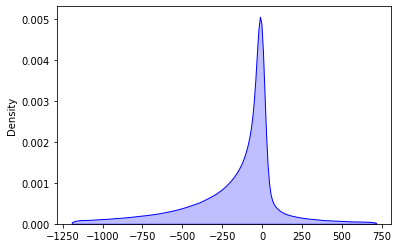

In [5]:
import seaborn as sns
sns.distplot(clean_2_all[:, 2], kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')


(array([  35791.,   52163.,   97488., 1205321.,  766013.,  373569.,
         245965.,  167862.,  113129.,   74331.]),
 array([-1066.00109801,  -781.92699666,  -497.85289531,  -213.77879396,
           70.29530739,   354.36940874,   638.44351009,   922.51761144,
         1206.59171279,  1490.66581414,  1774.73991549]),
 <BarContainer object of 10 artists>)

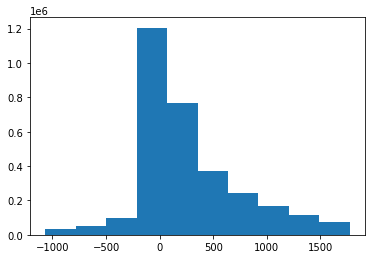

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(clean_0)
# plt.hist(output_field_np[:, 0])
#sns.distplot(output_field_np[:, 0], kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')


(array([387626., 374762., 360024., 344414., 325966., 307607., 288223.,
        268269., 247704., 227037.]),
 array([0.08726731, 0.21816684, 0.34906636, 0.47996589, 0.61086541,
        0.74176494, 0.87266447, 1.00356399, 1.13446352, 1.26536305,
        1.39626257]),
 <BarContainer object of 10 artists>)

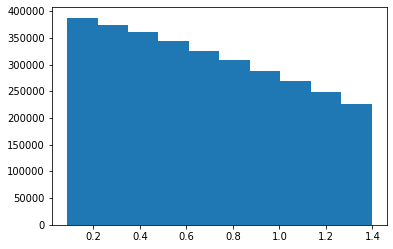

In [9]:
# mask = np.argwhere(output_field_np <= q3)
# mask.shape

from matplotlib import pyplot as plt

plt.hist(para_0[:,0])

#np.unique(output_field_np[:, 0], return_counts=True)


In [ ]:
output_field_np.shape

(2000000, 3)

## PlainDNN model development

In [2]:
# Plain DNN model


import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Add, Concatenate, Activation


# Define a customised loss function

def loss_func(y_true, y_pred): 
    
    # Root mean square loss
    squared_difference = tf.square(y_true - y_pred)
    mean_square_loss = tf.reduce_mean(squared_difference, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss)
    
    return root_mean_square_loss 
 
def loss_func_with_weights(y_true, y_pred): 

    alpha = 3.0
    beta = 5.0
    sq = tf.square(y_true - y_pred)
    sq1 = tf.reshape(sq[:, 0], shape=(-1, 1)) 
    sq2 = tf.reshape(alpha*sq[:, 1], shape=(-1, 1))
    sq3 = tf.reshape(beta*sq[:, 2], shape=(-1, 1))
    sq4 = Concatenate(axis=-1)([sq1, sq2, sq3])
    mean_square_loss = tf.reduce_mean(sq4, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss+1e-20)
    
    return root_mean_square_loss 

class PlainDNNModel(tf.keras.Model):
    def __init__(self):
        
        super(PlainDNNModel, self).__init__()
        
        self.dense1_1 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense1_2 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense1_3 = tf.keras.layers.Dense(796, activation=tf.nn.relu)


        self.dense2_1 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense2_2 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense2_3 = tf.keras.layers.Dense(796, activation=tf.nn.relu)


        self.dense3_1 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_2 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_3 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_4 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_o = tf.keras.layers.Dense(1)

        
    def call(self, inputs):
        
        x_1 = self.dense1_1(inputs)
        x_1 = self.dense1_2(x_1)
        x_1 = self.dense1_3(x_1)

        
        x_2 = self.dense2_1(x_1)
        x_2 = self.dense2_2(x_2)
        x_2 = self.dense2_3(x_2)

        x_3 = self.dense3_1(x_2)
        x_3 = self.dense3_2(x_3)
        x_3 = self.dense3_3(x_3)
        x_3 = self.dense3_4(x_3)
        x_3 = self.dense3_o(x_3)
        
        
        return x_3
    


# PlainModel = PlainDNNModel()  


# opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999)

# PlainModel.compile(optimizer=opt, loss='mse')

## Loading pre-trained model

In [24]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.layers import Add, Concatenate, Activation

source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Cone_data_4m'
# Define a customised loss function



# Axial component
# source_file_model = os.path.join(source_file, 're_HDNNmodel_IQR_ax')
# if os.getcwd != source_file_model:
#   os.chdir(source_file_model)

# PlainModel_ax = PlainDNNModel()  
# PlainModel_ax.load_weights('PlainDNN_400_796_clean') #PlainDNN_3001_noco


# opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999 )
# #Hmodel = tf.keras.models.load_model('HDNN_300', compile=False)

# PlainModel_ax.compile(optimizer=opt, loss='mse') # the loss_func is good enough we don't need the loss_func_with_weights

# Azimuthal component
# source_file_model = os.path.join(source_file, 're_HDNNmodel_IQR_az_co')
# if os.getcwd != source_file_model:
#   os.chdir(source_file_model)

# PlainModel_az = PlainDNNModel()  
# PlainModel_az.load_weights('PlainDNN_400_796_clean') #PlainDNN_3001_noco


# opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999)
# #Hmodel = tf.keras.models.load_model('HDNN_300', compile=False)

# PlainModel_az.compile(optimizer=opt, loss='mse') # the loss_func is good enough we don't need the loss_func_with_weights

# # # # Radial component
source_file_model = os.path.join(source_file, 're_HDNNmodel_IQR_az')
if os.getcwd != source_file_model:
  os.chdir(source_file_model)

PlainModel_ra = PlainDNNModel()  
PlainModel_ra.load_weights('PlainDNN_400_796_clean') #PlainDNN_3001_noco


opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999 )
#Hmodel = tf.keras.models.load_model('HDNN_300', compile=False)

PlainModel_ra.compile(optimizer=opt, loss='mse') # the loss_func is good enough we don't need the loss_func_with_weights


In [15]:
import os
out_cone = '/clusterdata/uqvngu19/scratch/Data_and_model/Cone_data_4m/Data_cone_testing_time_DL/outtest_cone'

os.chdir(out_cone)

with open('para_cone_200k_outtest', 'rb') as filename:
    para_cone = pickle.load(filename)

with open('output_field_cone_200k_outtest', 'rb') as filename:
    output_cone = pickle.load(filename)



In [22]:
para_ra = x_sScaler_ra.transform(np.array(para_cone))
output_cone_ra = y_sScaler_ra.transform(np.array(output_cone)[:, 2].reshape(-1, 1))

In [11]:
from sklearn.metrics import r2_score

In [26]:
out_pred_ra = PlainModel_ra.predict(para_ra)
r2_score(out_pred_ra, output_cone_ra)


-225.07559784738334

## Model testing

In [32]:
# Predicting the results
#m1_s_y_predicted_scaled_ax = PlainModel_ax.predict(m1_re_s_x_test_scaled_ax[:400000])

m1_s_y_predicted_scaled_az = PlainModel_az.predict(m1_re_s_x_test_scaled_az[:100000])

#m1_s_y_predicted_scaled_ra = PlainModel_ra.predict(m1_re_s_x_test_scaled_ra)

In [33]:
m1_re_s_x_test_scaled_az.shape

(192647, 5)

In [33]:
np.round(x_sScaler_ax.inverse_transform(m1_re_s_x_test_scaled_ax), decimals=3)[10:25]

array([[  1.371,  10.227,  80.457,   2.898, -18.211,   0.   ,   1.   ],
       [  0.264,  12.079,  38.454,   1.709, -22.193,   0.   ,   1.   ],
       [  0.918,   3.017,  92.638,   4.443,   1.548,   1.   ,   0.   ],
       [  0.654,   3.402,  80.37 ,   4.362, -63.977,   1.   ,   0.   ],
       [  0.125,  18.156, 143.365,   3.529, -70.045,   1.   ,   0.   ],
       [  0.543,  33.039, 145.453,   2.633,  57.582,   0.   ,   1.   ],
       [  0.574,  14.043,  11.756,   0.359,  56.836,   0.   ,   1.   ],
       [  0.791,   9.869,  98.39 ,   4.877,  62.373,   0.   ,   1.   ],
       [  0.57 ,  28.141,  50.659,   1.048, -57.065,   0.   ,   1.   ],
       [  0.653,  37.844,  68.211,   2.826, -71.908,   0.   ,   1.   ],
       [  0.537,   7.925, 108.949,   3.583, -41.264,   0.   ,   1.   ],
       [  0.826,   7.   ,  47.554,   3.378, -23.828,   0.   ,   1.   ],
       [  1.116,  25.746, 109.584,   1.614,  41.543,   0.   ,   1.   ],
       [  1.263,  40.155,  91.374,   4.372,  -0.829,   0.   ,   

In [83]:
y_sScaler_ax.inverse_transform(m1_s_y_predicted_scaled_ax_az)[10:25]

array([[-1.1060009e+00],
       [-8.1340160e+00],
       [-1.4542287e+02],
       [ 3.0563434e+02],
       [-4.6736176e+02],
       [ 1.1055179e-01],
       [-4.4391913e+02],
       [ 1.1246904e+01],
       [-3.4565845e+02],
       [-1.0089224e+03],
       [-2.5711195e+01],
       [ 3.6696896e+02],
       [-6.6725418e+01],
       [ 2.7530611e+01],
       [-7.2253857e+00]], dtype=float32)

In [84]:
np.round(output_field_np[mask][:,0][10:25], decimals=3)

array([-4.820000e-01, -7.173000e+00, -1.526190e+02,  3.229810e+02,
       -4.789920e+02, -4.340000e-01, -4.469070e+02,  1.246300e+01,
       -3.471940e+02, -1.001599e+03, -2.301100e+01,  3.688620e+02,
       -6.494600e+01,  2.572600e+01, -7.266000e+00])

In [3]:
import numpy as np
np.round(3.14567789, decimals=3)

3.146

In [5]:
aa = np.array([-4.820000e-01, -7.173000e+00, -1.526190e+02,  3.229810e+02,
       -4.789920e+02, -4.340000e-01, -4.469070e+02,  1.246300e+01,
       -3.471940e+02, -1.001599e+03, -2.301100e+01,  3.688620e+02,
       -6.494600e+01,  2.572600e+01, -7.266000e+00])

In [11]:
np.set_printoptions(suppress=True)

np.round(aa, decimals=3)

array([   -0.482,    -7.173,  -152.619,   322.981,  -478.992,    -0.434,
        -446.907,    12.463,  -347.194, -1001.599,   -23.011,   368.862,
         -64.946,    25.726,    -7.266])

In [49]:
#  pickle.dump(output_field_np[mask], filename)

# with open('para_axra_for_clean_az', 'wb') as filename:
#   pickle.dump(para_np[mask_index], filename)

(400000, 7)

In [69]:
m1_re_s_x_test_scaled_ax_az = x_sScaler_ax.transform(para_np[mask_index])
m1_re_s_x_test_scaled_ra_az = x_sScaler_ra.transform(para_np[mask_index])

In [29]:
from sklearn.metrics import r2_score, mean_squared_error
r2ax = r2_score( m1_re_s_y_test_scaled_ax, m1_s_y_predicted_scaled_ax)
#r2az = r2_score( m1_re_s_y_test_scaled_az, m1_s_y_predicted_scaled_az)
r2ra = r2_score( m1_re_s_y_test_scaled_ra, m1_s_y_predicted_scaled_ra)

print(f'ax: {r2ax}, ra: {r2ra}')


ax: 0.9997323478079303, ra: 0.9996865843094201


In [63]:
np.round(output_field_np[mask][10:25,1], decimals=3)

array([  -0.542,   14.077,  191.479,  181.162,  136.301,   -3.515,
       -105.233,   55.268,  269.369,  258.664,   18.104,  113.34 ,
         94.735, -111.996,   -2.265])

In [78]:
np.round(para_np[mask_index][10:25], decimals=3)

array([[ 8.17000e-01,  3.03800e+00,  1.32734e+02,  4.02600e+00,
         5.91990e+01,  1.00000e+00,  0.00000e+00],
       [ 7.50000e-01,  3.13600e+00,  4.41200e+01,  1.15400e+00,
        -1.82220e+01,  1.00000e+00,  0.00000e+00],
       [ 6.63000e-01,  1.40440e+01,  1.40350e+01,  6.34000e-01,
        -5.80130e+01,  1.00000e+00,  0.00000e+00],
       [ 5.94000e-01,  2.25220e+01,  3.59970e+01,  2.62100e+00,
        -7.43590e+01,  1.00000e+00,  0.00000e+00],
       [ 1.23100e+00,  8.73500e+00,  8.53440e+01,  3.37000e-01,
        -3.50830e+01,  1.00000e+00,  0.00000e+00],
       [ 3.47000e-01,  4.86500e+00,  7.85800e+00,  5.04100e+00,
        -6.04760e+01,  1.00000e+00,  0.00000e+00],
       [ 1.06200e+00,  1.14050e+01,  8.37240e+01,  5.98700e+00,
        -3.76460e+01,  1.00000e+00,  0.00000e+00],
       [ 3.82000e-01,  2.30630e+01,  1.27298e+02,  2.00200e+00,
        -4.14300e+00,  1.00000e+00,  0.00000e+00],
       [ 9.70000e-01,  1.92620e+01,  1.19255e+02,  8.08000e-01,
        -5.72850

In [34]:
np.set_printoptions(suppress=True)

y_pred_ax = np.round(y_sScaler_ax.inverse_transform(m1_s_y_predicted_scaled_ax)[10:25], decimals=3)
y_test_ax = np.round(y_sScaler_ax.inverse_transform(m1_re_s_y_test_scaled_ax)[10:25], decimals=3)

print(y_pred_ax)
print(y_test_ax)

[[  78.25 ]
 [  46.026]
 [   0.119]
 [   0.442]
 [   1.021]
 [ 295.672]
 [ 397.835]
 [  66.761]
 [ 292.062]
 [ 480.286]
 [  16.156]
 [  32.015]
 [ 468.435]
 [1165.799]
 [ 396.845]]
[[  76.92 ]
 [  47.966]
 [   0.024]
 [   0.685]
 [   1.666]
 [ 297.8  ]
 [ 394.845]
 [  63.862]
 [ 292.064]
 [ 479.921]
 [  16.967]
 [  32.258]
 [ 470.691]
 [1167.075]
 [ 399.01 ]]


In [67]:
(113.3 - 111.9)/111.9*100

1.251117068811431

In [12]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np 

np.sqrt(mean_squared_error(y_test, y_pred))

16.80501

In [13]:
16.81/np.subtract(*np.percentile(y_test, [5, 95]))

-0.01085151360611378

In [14]:
np.subtract(*np.percentile(y_test, [5, 95]))

-1549.092652893066

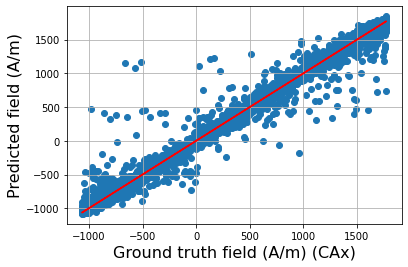

In [19]:
import matplotlib.pyplot as plt 

y_pred = y_sScaler.inverse_transform(s_y_predicted_scaled)
a, b = np.polyfit(np.squeeze(y_test), np.squeeze(y_pred), 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, a*y_test+b, color='r')
plt.xlabel('Ground truth field (A/m) (CAx)', fontsize=16)
plt.ylabel('Predicted field (A/m)', fontsize=16)
plt.grid('on')

In [ ]:
with open('out_para_cone_dataset', 'rb') as filename:
  out_x_scaled = pickle.load(filename)

with open('out_H_cone_dataset', 'rb') as filename:
  out_y_scaled = pickle.load(filename)

In [ ]:
x = x_sScaler.transform(out_x_scaled)
y = y_sScaler.transform(np.array(out_y_scaled)[:, 2].reshape(-1, 1))

In [1]:
np.array(out_x_scaled).shape

NameError: name 'np' is not defined

In [20]:
y_pred - y_test

array([[-1.2627349 ],
       [ 7.484314  ],
       [ 2.5948982 ],
       ...,
       [ 4.2545166 ],
       [ 0.5329437 ],
       [ 0.35831833]], dtype=float32)

mean: 0.27032527327537537, std: 1.05060875415802


/scratch/cvl/uqvngu19/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


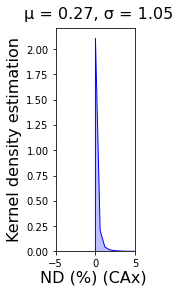

In [24]:
# Plotting pairs
# Not normalized
import seaborn as sns
index_ = 0

#vmin = np.min(s_y_test_scaled[:, index_])
#vmax = np.max(s_y_test_scaled[:, index_])
cmap = 'YlGnBu'
 # 0 for axial, 1 for azimuthal and 2 for radial components

height = [0.00148, 0.788, 0.00395]
low = [-0.000227, -0.12, -0.000588]
plt.figure(figsize=(10, 14))

interq_955 = np.subtract(*np.percentile(y_test, [95, 5]))
errors = abs(y_pred - y_test)*100/interq_955


# errors = (s_y_predicted_scaled[:, index_+1].reshape(400000,-1)-s_y_test_scaled[:, index_+1].reshape(400000,-1))*100/(
#     np.max(s_y_test_scaled[:, index_+1]) - np.min(s_y_test_scaled[:, index_+1]))



plt.subplot(342)
mean = np.mean(errors)
std = np.std(errors)

print('mean: {}, std: {}'.format(mean, std))

sns.distplot(errors, kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')
#sns.kdeplot(data=errors, fill=True)
plt.xlim(-5, 5)
plt.text(-7, -0.3, 'ND (%) (CAx)', fontsize=16)
#plt.text(-20, 1.6*low[index_+1], 'j) Azimuthal component', fontsize=12)
# #plt.xlabel('b) Azimuthal component', fontsize=12)
plt.ylabel('Kernel density estimation', fontsize=16)
plt.text(-9, 2.3, '\u03BC = {:2.2}, \u03C3 = {:0.3}'.format(mean, std), fontsize=16) # height index_ .2 for axial; = 6.5 for azimuthal and .42 for radial
# #plt.tight_layout(rect=(0., 0., 1, 1))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1., hspace=None)








